In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
co2_data = pd.read_csv('co2_emissions.csv')

In [3]:
co2_data.head(5)

,End Use,Sector,CO2 emissions
0,Space Heating,Residential,273.50
1,Space Cooling,Residential,111.43
2,Water Heating,Residential,139.38
3,Refrigeration,Residential,51.01
4,Cooking,Residential,28.95


In [4]:
sector_consumption=co2_data.groupby(['Sector'])['CO2 emissions'].sum()
sector_consumption1=sector_consumption.reset_index()
sector_consumption1.head(5)

,Sector,CO2 emissions
0,Biogenic Energy Combustion,550.62
1,Commercial,922.43
2,Industrial Manufacturing,1154.27
3,Industrial Non-Manufacturing,259.85
4,Residential,1034.49


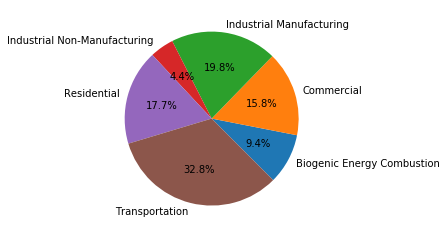

In [5]:
Y=sector_consumption1['Sector']
X= sector_consumption1['CO2 emissions']

#plt.bar(X, Y, width=0.6, color='g', edgecolor='k')
plt.pie(X, labels=Y,autopct='%.1f%%', startangle=-45)
plt.show()

In [6]:
sector_consumption2=co2_data.groupby(['Sector', 'End Use'])['CO2 emissions'].sum()
sector_consumption3=sector_consumption2.reset_index()
sector_consumption3.head(5)

,Sector,End Use,CO2 emissions
0,Biogenic Energy Combustion,Biodiesel,22.61
1,Biogenic Energy Combustion,Biofuels Heat and Coproducts,75.80
2,Biogenic Energy Combustion,Biogenic Waste,24.30
3,Biogenic Energy Combustion,Biomass,173.22
4,Biogenic Energy Combustion,Electric Power Sector,8.48


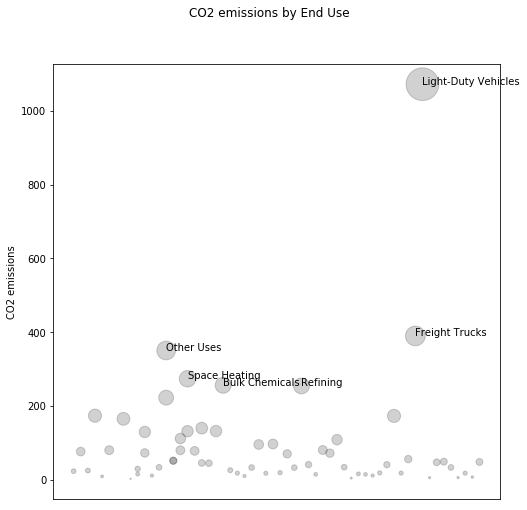

In [13]:
import math
plt.figure(figsize=(8,8))
plt.scatter('End Use', 'CO2 emissions',s=sector_consumption3['CO2 emissions'], data=sector_consumption3, alpha=0.2,color=(0.1, 0.1, 0.1))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('CO2 emissions')
plt.suptitle('CO2 emissions by End Use')
for i in range(len(sector_consumption3)):
    row = sector_consumption3.iloc[i]
    if row['CO2 emissions'] > 250:
        x = row['End Use']
        y = float(row['CO2 emissions'])
        plt.text(x, y, row['End Use'], fontsize=10)

plt.show()

In [8]:
pivot_df = co2_data.pivot_table(index='Sector', 
                          columns='End Use', 
                          values='CO2 emissions',
                          fill_value=0)
pivot_df

End Use,Agriculture,Air,Aluminum,Balance of Manufacturing,Biodiesel,Biofuels Heat and Coproducts,Biogenic Waste,Biomass,Bulk Chemicals,Bus Transportation,...,Renewable Diesel and Gasoline,"Shipping, Domestic","Shipping, International",Space Cooling,Space Heating,Televisions and Related Equipment,Transportation Equipment,Ventilation,Water Heating,Wood Products
Sector,,,,,,,,,,,,,,,,,,,,,
Biogenic Energy Combustion,0.00,0.00,0.00,0.00,22.61,75.8,24.3,173.22,0.00,0.00,...,1.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Commercial,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,79.41,131.14,0.00,0.00,77.69,45.03,0.00
Industrial Manufacturing,0.00,0.00,44.36,131.47,0.00,0.0,0.0,0.00,255.78,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,40.57,0.00,0.00,14.11
Industrial Non-Manufacturing,80.09,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Residential,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,111.43,273.50,40.31,0.00,0.00,139.38,0.00
Transportation,0.00,172.66,0.00,0.00,0.00,0.0,0.0,0.00,0.00,17.49,...,0.00,6.76,47.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00


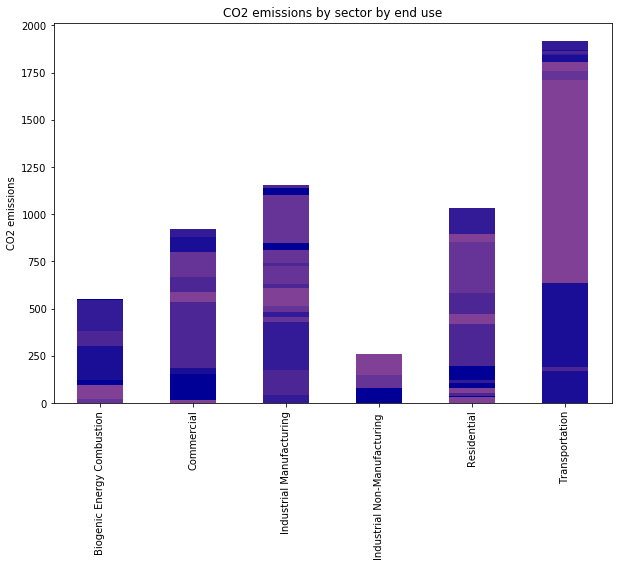

In [9]:
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
colors = [(i/10, i/20, 0.59) for i in range(len(pivot_df))]
pivot_df.plot.bar(stacked=True, color=colors, figsize=(10,7), legend=None)
plt.title('CO2 emissions by sector by end use')
plt.ylabel('CO2 emissions')
plt.xlabel('')
plt.show()

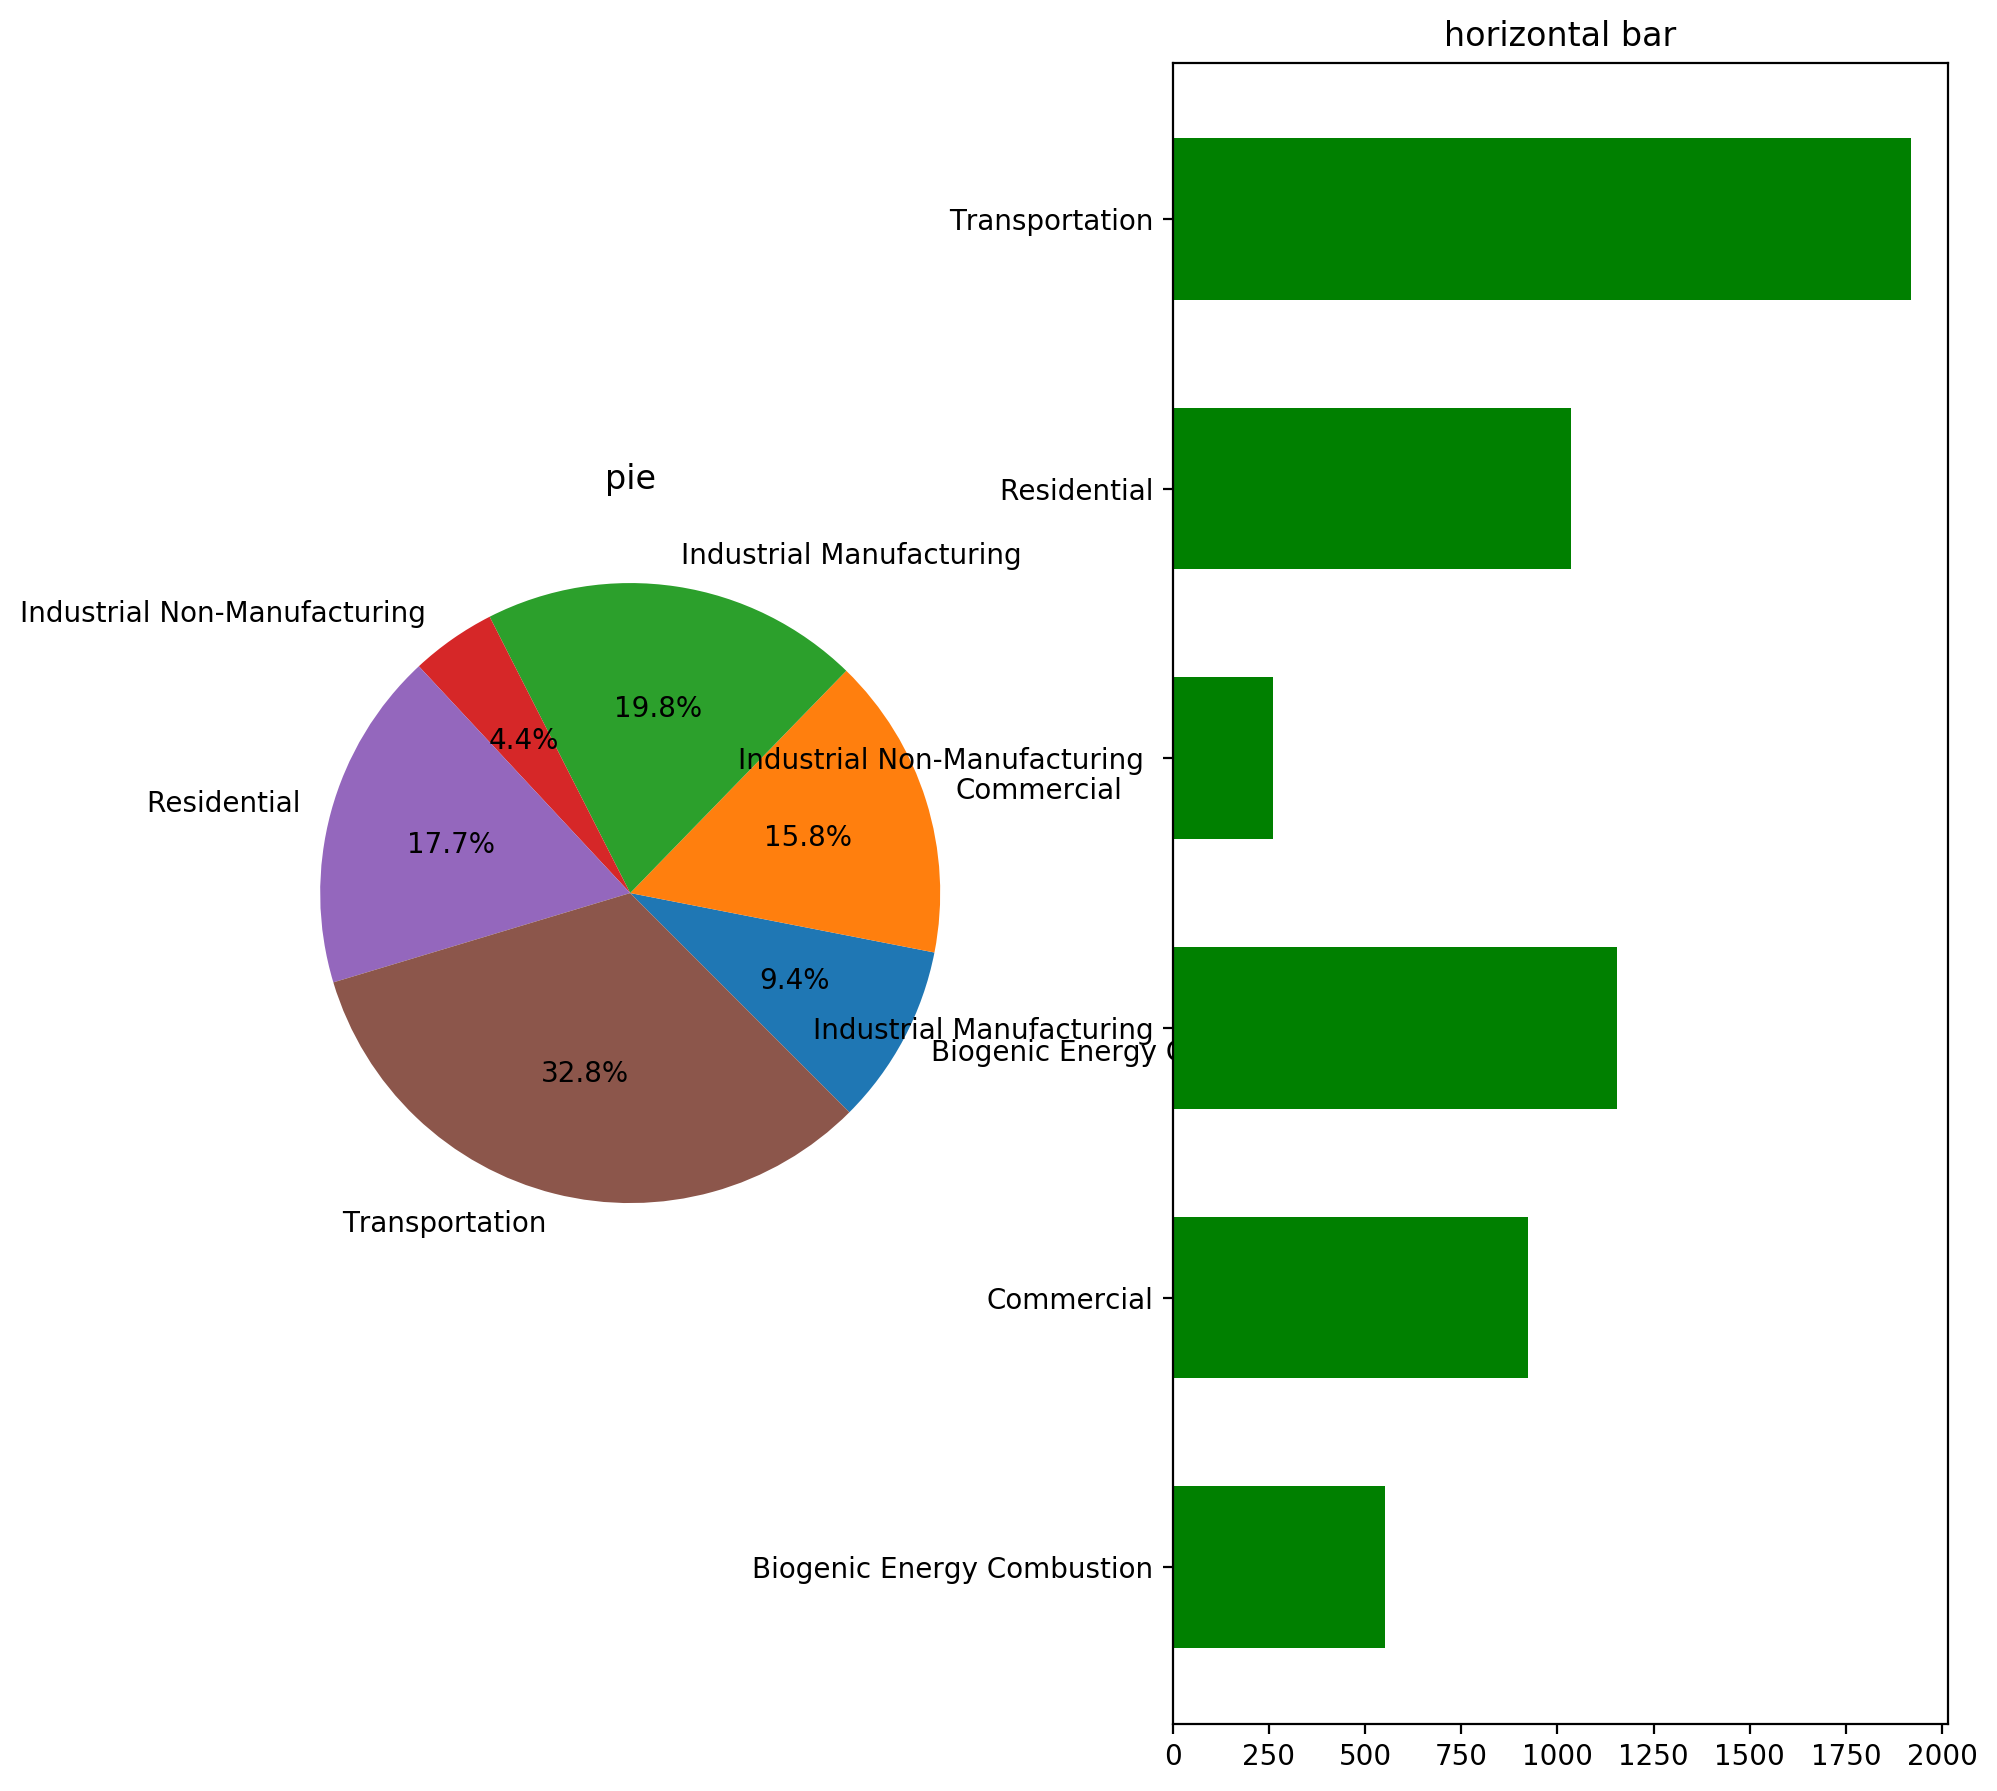

In [15]:
plt.figure(figsize=(11,11), dpi=200)
plt.subplot(1,2,1)
Y=sector_consumption1['Sector']
X= sector_consumption1['CO2 emissions']
plt.title('pie')

#plt.bar(X, Y, width=0.6, color='g', edgecolor='k')
plt.pie(X, labels=Y,autopct='%.1f%%', startangle=-45)

plt.subplot(1,2,2)
plt.barh(Y, X, height=0.6, color='g')
plt.title('horizontal bar')
plt.show()

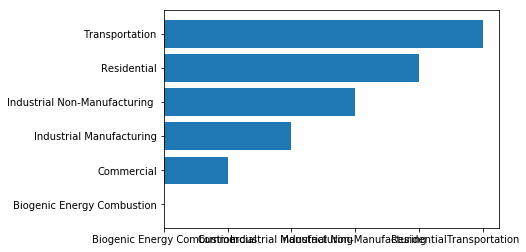

In [11]:
df_sectors=co2_data.groupby(['Sector'])['CO2 emissions'].sum()
plt.barh(df_sectors.index,df_sectors.index)
plt.show()

Text(0.5, 1.0, 'Residential')

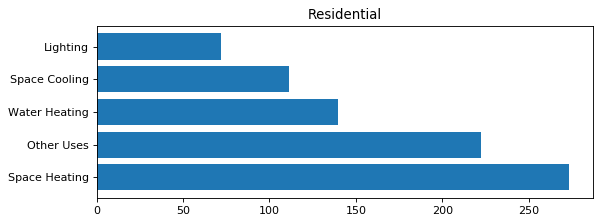

In [16]:
df=co2_data
plt.figure(figsize=(8,20), dpi=80)
sectors=df['Sector'].unique()
num_sectors=len(sectors)

plt.subplot(num_sectors,1,1)
sector1=sectors[0]
df_current=df[df['Sector'] == sector1].sort_values(by='CO2 emissions', ascending=False).iloc[:5]
plt.barh(df_current['End Use'], df_current['CO2 emissions'])
plt.title(sector1)

Text(0.5, 1.0, 'Residential')

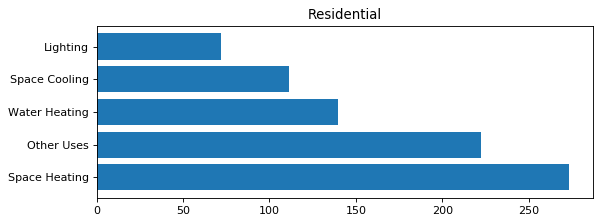

In [17]:
#GroupBy approach
df=co2_data
plt.figure(figsize=(8,20), dpi=80)
sectors=df['Sector'].unique()
num_sectors=len(sectors)

def get_top5(df):
    return df.sort_values(by='CO2 emissions', ascending=False).iloc[:5]
    
df_grouped=df.groupby(['Sector']).apply(get_top5)
df_grouped.reset_index(level=1, inplace=True)
df_grouped

plt.subplot(num_sectors,1,1)
sector1=sectors[0]
#df_current=df[df['Sector'] == sector1].sort_values(by='CO2 emissions', ascending=False).iloc[:5]
plt.barh(df_grouped.loc[sector1]['End Use'], df_grouped.loc[sector1]['CO2 emissions'])
plt.title(sector1)

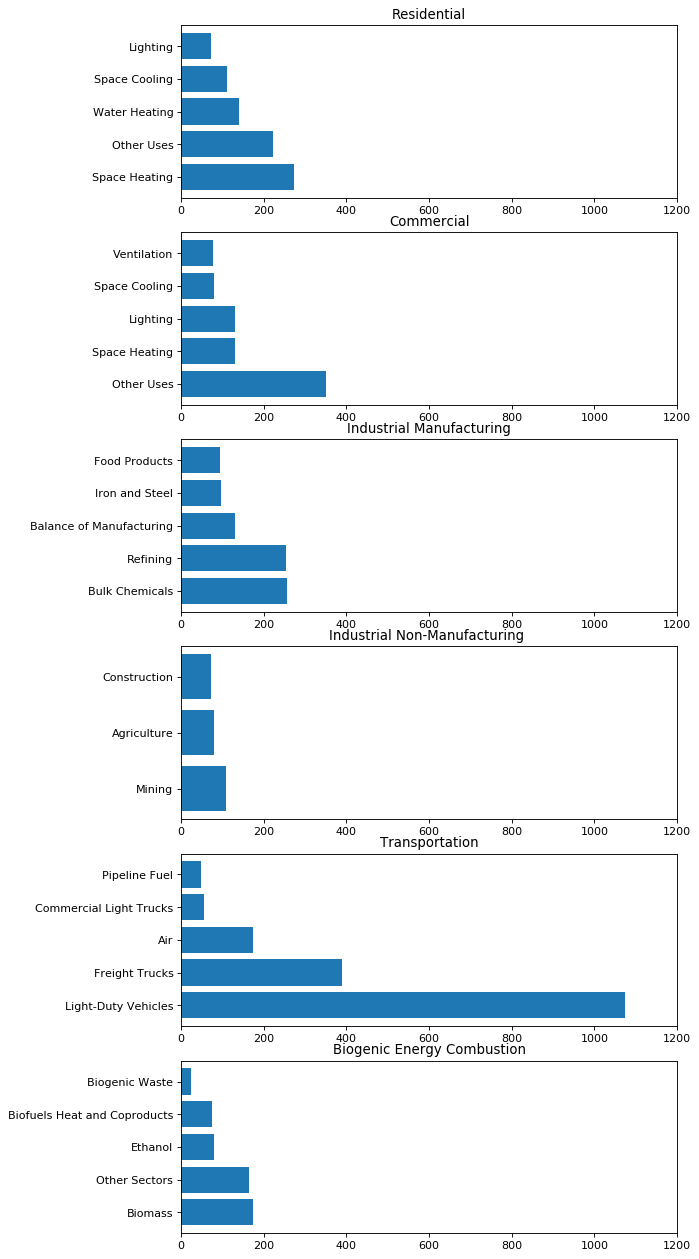

In [18]:
df=co2_data
plt.figure(figsize=(8,20), dpi=80)
sectors=df['Sector'].unique()
num_sectors=len(sectors)

for i in range(num_sectors):
    plt.subplot(num_sectors,1,i+1)
    sector1=sectors[i]
    df_current=df[df['Sector'] == sector1].sort_values(by='CO2 emissions', ascending=False).iloc[:5]
    plt.barh(df_current['End Use'], df_current['CO2 emissions'])
    plt.title(sector1)
    plt.xlim(0,1200)